In [36]:
import sys
sys.path.append('../src/')
from tqdm import tqdm
import pandas as pd
import wandb
import asyncio
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d


In [37]:

api = wandb.Api()
entity, project = "ajzero", "AlphaZero"
x_metric = "planning_budget"
tags = ['2024-03-14-14-40-06',]
filters = {"tags": {"$in": tags}}
runs = api.runs(entity + "/" + project, filters=filters)
runs

<Runs ajzero/AlphaZero>

In [38]:
# crete a dataframe from runs and summary metrics

data = []
for run in tqdm(runs):
    summary = run.summary._json_dict
    config = run.config
    summary.update(config)
    data.append(summary)

df = pd.DataFrame(data)

df


100%|██████████| 12/12 [00:00<00:00, 52211.25it/s]


,Self_Play/return_STD,Self_Play/Mean_Timesteps,Training/Regularization_loss,Self_Play/Timesteps_STD,Self_Play/returns,Self_Play/Entropies,Self_Play/Runtime_per_Timestep,Self_Play/Max_Return,Training/Replay_Buffer_Size,_step,...,value_loss_weight,max_episode_length,policy_loss_weight,sample_batch_ratio,observation_embedding,regularization_weight,root_selection_policy,episodes_per_iteration,tree_evaluation_policy,replay_buffer_multiplier
0,0.408248,35.166667,195.917816,22.067321,"{'values': [5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...","{'bins': [0.9490663409233093, 0.94965638905106...",4151.459716,1,30,19,...,0.5,150,0.5,1,coordinate,0,PolicyPUCT,6,mvc,5
1,0.408248,63.166667,204.766708,26.103001,"{'_type': 'histogram', 'values': [1, 0, 0, 0, ...","{'values': [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1...",192.058047,1,30,19,...,0.5,150,0.5,1,coordinate,0,PUCT,6,mvc,5
2,0.516398,40.500000,211.157547,28.766300,"{'_type': 'histogram', 'bins': [0, 0.015625, 0...","{'_type': 'histogram', 'bins': [0.929402235077...",2759.551440,1,30,19,...,0.5,150,0.5,1,coordinate,0,PUCT,6,visit,5
3,0.516398,27.166667,217.589981,26.339451,"{'bins': [0, 0.015625, 0.03125, 0.046875, 0.06...","{'_type': 'histogram', 'bins': [0.815253666469...",3156.828221,1,30,19,...,0.5,150,0.5,1,coordinate,0,PolicyPUCT,6,mvc,5
4,0.516398,39.666667,213.454742,35.398682,"{'bins': [0, 0.015625, 0.03125, 0.046875, 0.06...","{'_type': 'histogram', 'bins': [0.773537397384...",3745.785714,1,30,19,...,0.5,150,0.5,1,coordinate,0,PUCT,6,mvc,5
5,0.408248,15.000000,218.030823,8.318654,"{'_type': 'histogram', 'bins': [0, 0.015625, 0...","{'values': [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",5053.977778,1,30,19,...,0.5,150,0.5,1,coordinate,0,PUCT,6,visit,5
6,40.416581,100.000000,229.729370,0.000000,"{'_type': 'histogram', 'bins': [-199, -197.453...","{'values': [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1...",1047.068333,-100,30,14,...,0.5,100,0.5,1,coordinate,0,PUCT,6,visit,5
7,40.416581,100.000000,224.990356,0.000000,"{'values': [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...","{'_type': 'histogram', 'bins': [0.771721191406...",325.336667,-100,30,14,...,0.5,100,0.5,1,coordinate,0,PolicyPUCT,6,mvc,5
8,26.731380,44.833333,232.131882,26.731380,"{'values': [1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0...","{'_type': 'histogram', 'bins': [0.341866374015...",1398.501859,98,30,29,...,0.5,300,0.5,1,default,0,PUCT,6,mvc,5
9,51.123380,100.000000,236.846481,0.000000,"{'bins': [-199, -197.453125, -195.90625, -194....","{'_type': 'histogram', 'bins': [0.686264648437...",577.288333,-100,30,14,...,0.5,100,0.5,1,coordinate,0,PUCT,6,mvc,5


In [39]:
df.env_params

0     {'id': 'FrozenLake-v1', 'desc': None, 'map_nam...
1     {'id': 'FrozenLake-v1', 'desc': None, 'map_nam...
2     {'id': 'FrozenLake-v1', 'desc': None, 'map_nam...
3     {'id': 'FrozenLake-v1', 'desc': None, 'map_nam...
4     {'id': 'FrozenLake-v1', 'desc': None, 'map_nam...
5     {'id': 'FrozenLake-v1', 'desc': None, 'map_nam...
6     {'id': 'CliffWalking-v0', 'max_episode_steps':...
7     {'id': 'CliffWalking-v0', 'max_episode_steps':...
8      {'id': 'CartPole-v1', 'max_episode_steps': None}
9     {'id': 'CliffWalking-v0', 'max_episode_steps':...
10     {'id': 'CartPole-v1', 'max_episode_steps': None}
11     {'id': 'CartPole-v1', 'max_episode_steps': None}
Name: env_params, dtype: object

In [40]:
df.columns

Index(['Self_Play/return_STD', 'Self_Play/Mean_Timesteps',
       'Training/Regularization_loss', 'Self_Play/Timesteps_STD',
       'Self_Play/returns', 'Self_Play/Entropies',
       'Self_Play/Runtime_per_Timestep', 'Self_Play/Max_Return',
       'Training/Replay_Buffer_Size', '_step', 'episodes',
       'Self_Play/Total_Mean_Return', 'environment_steps',
       'Training/Value_Simularities', 'Self_Play/Min_Timesteps', 'grad_steps',
       'Self_Play/Total_Timesteps', 'Training/Policy_loss',
       'Training/Value_and_Policy_loss', '_runtime', 'Self_Play/Mean_Return',
       'Self_Play/EMA_Return', 'Self_Play/Total_Runtime', '_timestamp',
       'Self_Play/Timesteps', 'Self_Play/Min_Return', 'Self_Play/Mean_Entropy',
       'Training/Value_loss', 'Training/Learning_Rate',
       'Self_Play/Cumulative_Return', '_wandb', 'ncols', 'layers', 'puct_c',
       'workers', 'lr_gamma', 'dir_alpha', 'env_params', 'eval_param',
       'hidden_dim', 'iterations', 'model_type', 'norm_layer', 'dir_

In [41]:
save_folder = 'outfiles'


def name_fn(name):
    # remove "Self_Play/" prefix if it exists
    if name.startswith("Self_Play/"):
        name = name[len("Self_Play/"):]

    # replace slash with underscore
    name = name.replace("/", "_")

    # change underscore to space
    name = name.replace("_", " ")
    return name

In [42]:
df.env_description.unique()

array(['FrozenLake-v1-8x8-150-20', 'FrozenLake-v1-4x4-150-20',
       'CliffWalking-v0-100-15', 'CartPole-v1-300-30'], dtype=object)

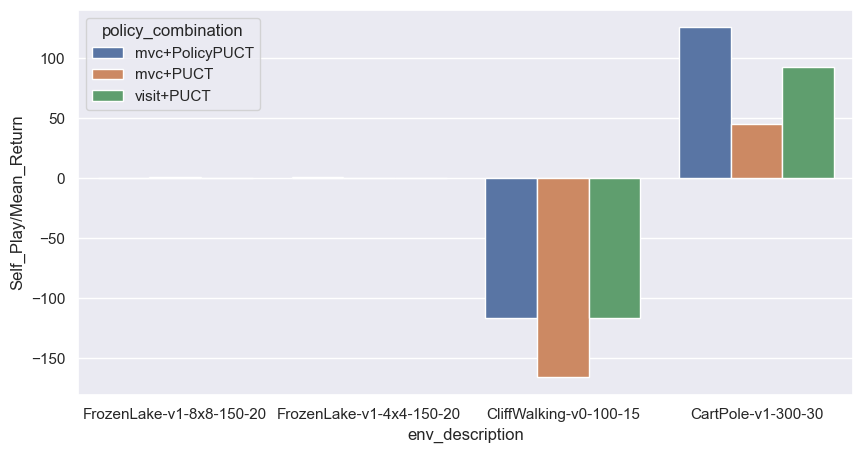

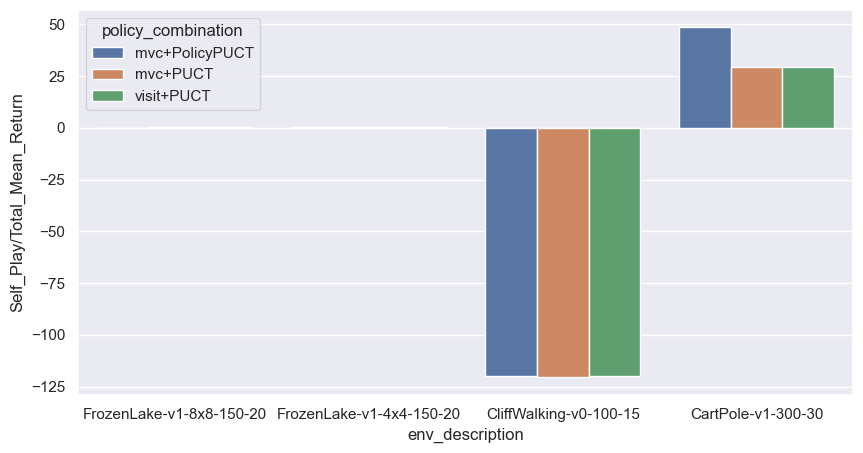

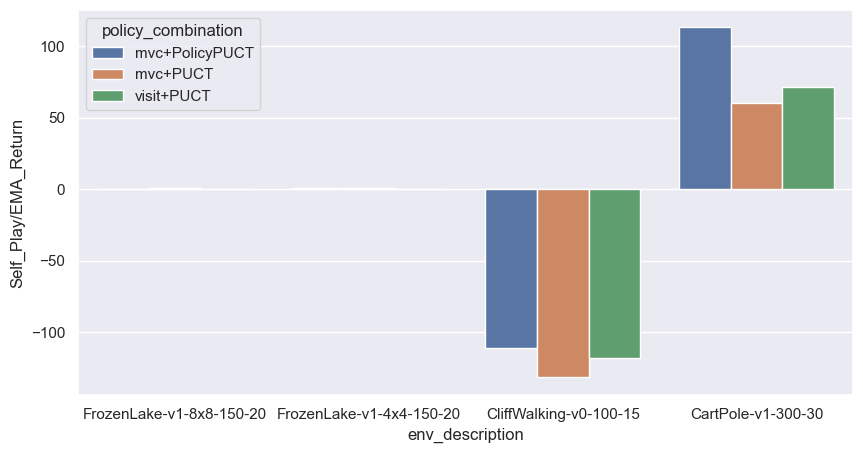

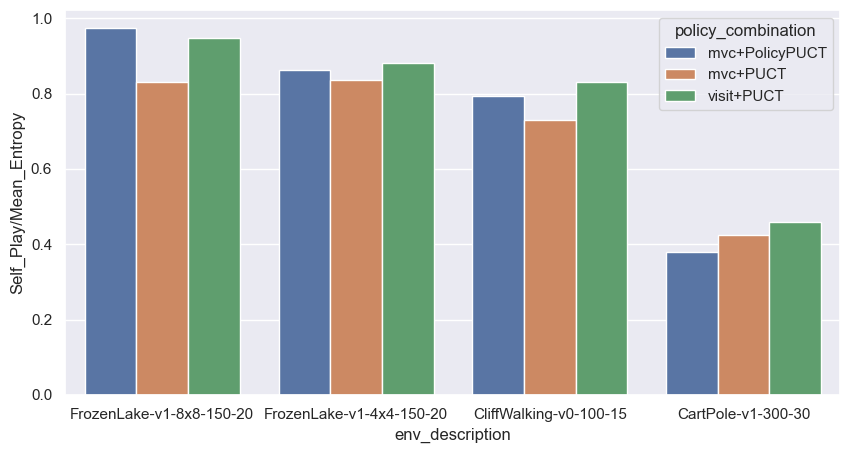

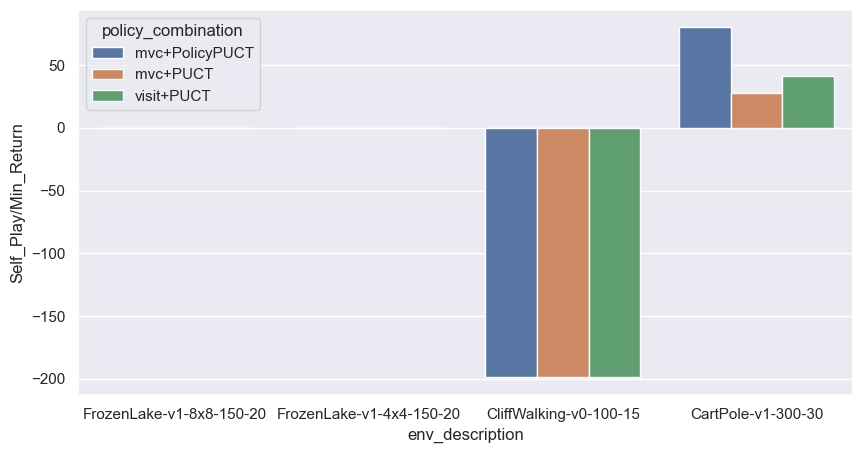

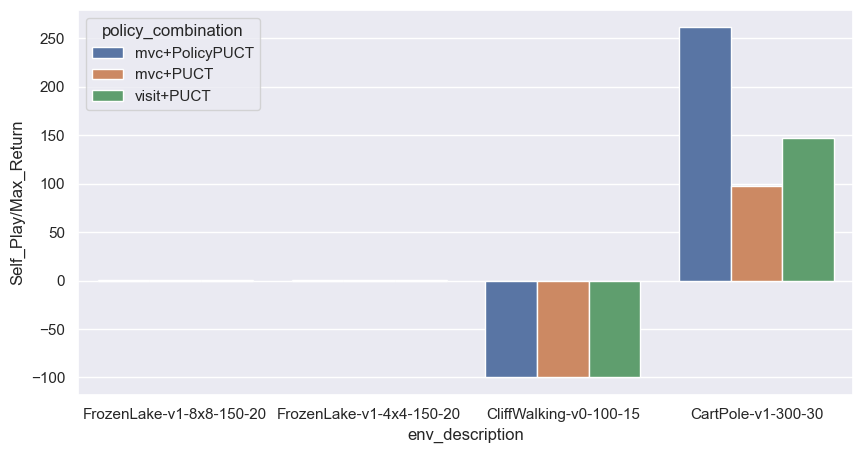

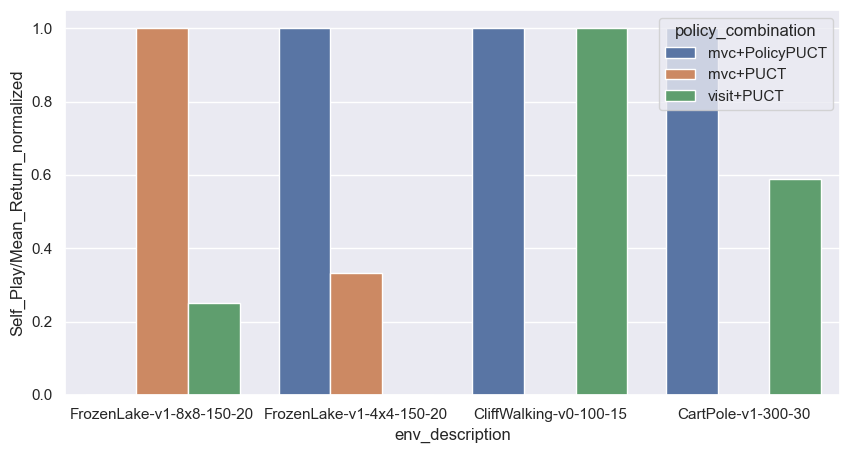

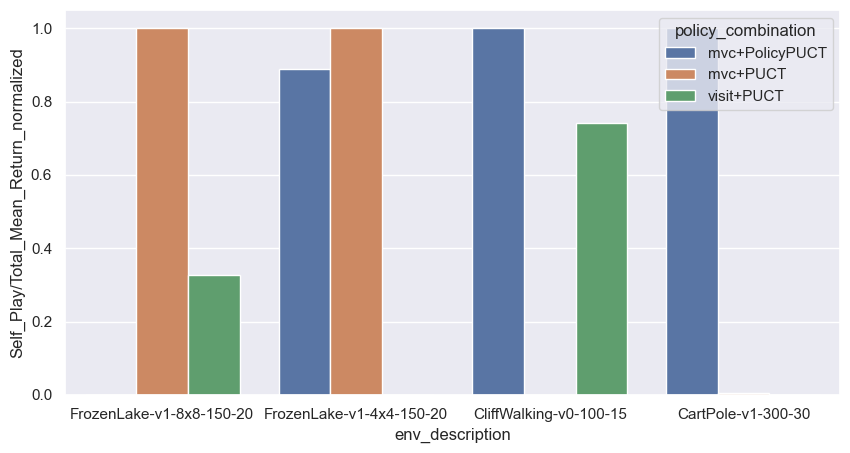

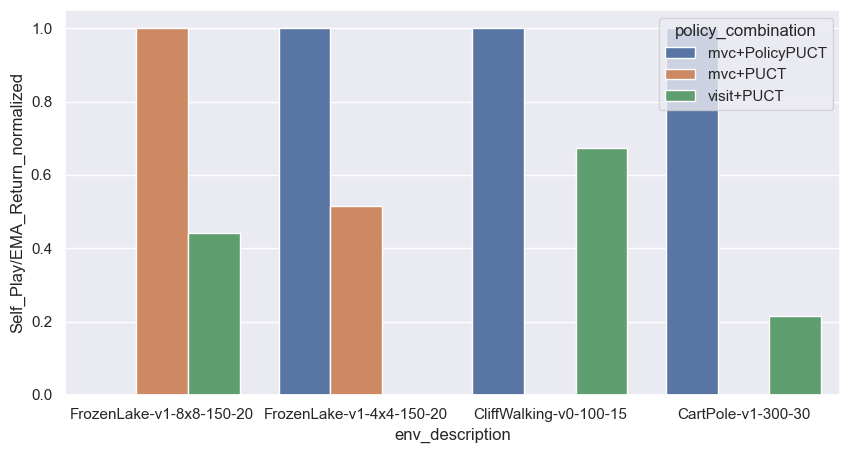

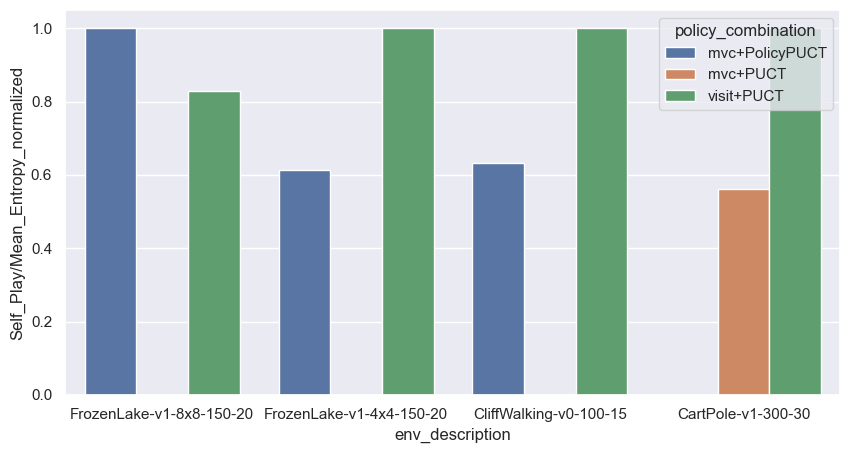

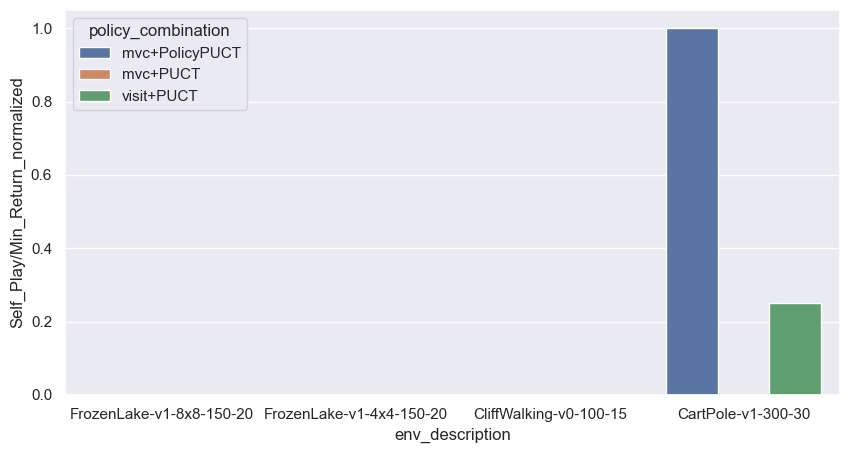

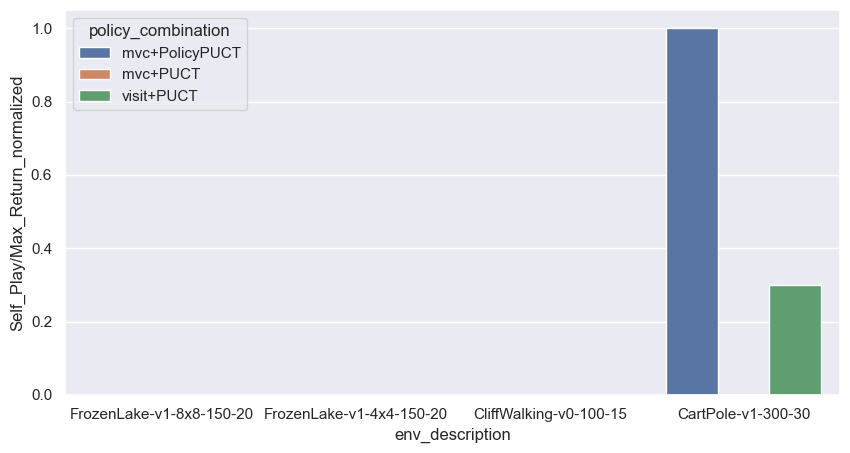

In [43]:


df['policy_combination'] = df['tree_evaluation_policy'] + "+" + df['selection_policy']



metrics = ['Self_Play/Mean_Return', "Self_Play/Total_Mean_Return", "Self_Play/EMA_Return", 'Self_Play/Mean_Entropy', 'Self_Play/Min_Return',
           'Self_Play/Max_Return',
        #    'max_Self_Play/Mean_Return', 'max_Self_Play/Mean_Return_step'
           ]

def normalize(series):
    return (series - series.min()) / (series.max() - series.min())
# Apply normalization to each metric within each env_description group
for metric in metrics:
    df[f'{metric}_normalized'] = df.groupby('env_description')[metric].transform(normalize)

# min_max_returns = {
#     'FrozenLake-v1-8x8-100-20': {'min': 0, 'max': 1},
#     'FrozenLake-v1-4x4-100-20': {'min': 0, 'max': 1},
#     'CliffWalking-v0-100-15': {'min': -150, 'max': -13},
#     'CartPole-v1-300-30': {'min': 0, 'max': 300},
#     # Add other environments as needed
# }

# # Function to normalize a value
# def normalize(value, min_val, max_val):
#     return (value - min_val) / (max_val - min_val)

# Apply normalization for each metric
for metric in metrics:
    # Apply normalization based on the min and max returns for each env_description
    # df[metric + '_normalized'] = df.groupby('env_description')[metric].transform(lambda x: normalize(x, min_max_returns[x.name]['min'], min_max_returns[x.name]['max']))
    df[f'{metric}_normalized'] = df.groupby('env_description')[metric].transform(normalize)


normalized_metrics = [f'{metric}_normalized' for metric in metrics]

estimator = "mean"
bar_groups = 'env_description'
group = 'policy_combination'
for metric in metrics + normalized_metrics:
    # sns.set_theme(style="darkgrid")

    sns.barplot(data=df, x=bar_groups, y=metric, hue=group, estimator=estimator)
    # make wider
    plt.gcf().set_size_inches(10, 5)

    # save as pdf
    # plt.savefig(f'{save_folder}/{name_fn(metric).replace(" ", "_")}_by_policy_{estimator}.pdf')

    # Show the plot
    plt.show()
